In [1]:
import os
import random
cat_dir = os.path.join("../data/train/cats")
dog_dir = os.path.join("../data/train/dogs")

In [112]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
def getCatsAndDogs():
    cats = []
    dogs = []
    catFiles = os.listdir(cat_dir)
    dogFiles = os.listdir(dog_dir)
    
    for fileNum in np.arange(0,len(os.listdir(cat_dir))):
        ##get Cat
        im = cv2.imread(os.path.join(cat_dir,"cat."+str(fileNum)+".jpg")) 
        if(type(im) != type(None)):
            b,g,r = cv2.split(im)
            im_norm = cv2.merge([r,g,b])
            reshaped_im = cv2.resize(im_norm,(150,150))
            cats.append(reshaped_im)
        ##get Dog
        im = cv2.imread(os.path.join(dog_dir,"dog."+str(fileNum)+".jpg"))
        if(type(im) != type(None)):
            b,g,r = cv2.split(im)
            im_norm = cv2.merge([r,g,b])
            reshaped_im = cv2.resize(im_norm,(150,150))
            dogs.append(reshaped_im)
    return cats,dogs

#dogs are 1 cats are 0
def makeLabels(cats,dogs):
    labels = []
    images = []
    images.append(cats)
    images.append(dogs)
    labels.append(np.zeros(len(cats), dtype = int))
    labels.append(np.ones(len(dogs),dtype = int))
    
    return np.concatenate(labels),np.concatenate(images)


In [54]:
cats,dogs = getCatsAndDogs()


In [113]:
labels,images = makeLabels(cats[0:500],dogs[0:500])

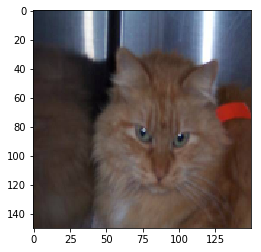

In [55]:
plt.imshow(cats[100])
plt.show()

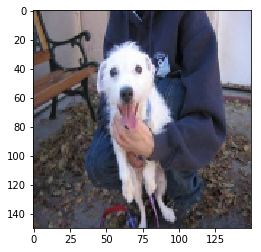

In [56]:
plt.imshow(dogs[100])
plt.show()

In [43]:
from keras.models import load_model
from keras import models
model = load_model("Fine_Tuning.h5")
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total params: 22,122,049
Trainable params: 6,817,281
Non-trainable params: 15,304,768
_________________________________________________________________


In [47]:
layer = model.get_layer("dense_29")

In [48]:
layer_output = layer.output

In [49]:
activation_model = models.Model(input=model.input, outputs=[layer_output])

C:\Users\gabal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("vg...)`
  """Entry point for launching an IPython kernel.


In [114]:
activations = activation_model.predict(images)

In [115]:
activations.shape

(1000, 256)

In [116]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

In [117]:
class_names = ["cats","dogs"]
def data_scatter(vecs, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

In [118]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

catDog_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 13.530732154846191 seconds


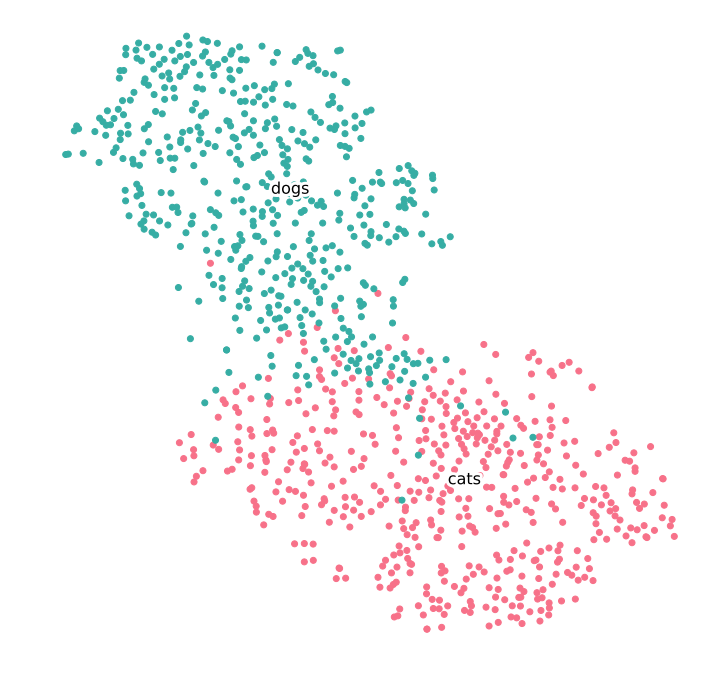

In [119]:
data_scatter(catDog_tsne,labels)